In [1]:
from get_dataset import * 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers
import seaborn as sns

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-19 18:42:52.209864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [29]:
ds_train = get_dataset("train").batch(64)
ds_test = get_dataset("test").batch(64)

In [42]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.SimpleRNN(64),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_23 (SimpleRNN)   (None, 64)                12416     
                                                                 
 dense_20 (Dense)            (None, 12)                780       
                                                                 
Total params: 13,196
Trainable params: 13,196
Non-trainable params: 0
_________________________________________________________________


In [43]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30
348/348 [==============================] - 11s 28ms/step - loss: 2.1861 - accuracy: 0.2143 - val_loss: 2.4925 - val_accuracy: 0.1941
Epoch 2/30
348/348 [==============================] - 10s 28ms/step - loss: 2.1833 - accuracy: 0.2236 - val_loss: 2.4229 - val_accuracy: 0.1529
Epoch 3/30
348/348 [==============================] - 10s 29ms/step - loss: 2.1855 - accuracy: 0.2162 - val_loss: 2.3946 - val_accuracy: 0.1396
Epoch 4/30
348/348 [==============================] - 10s 28ms/step - loss: 2.1717 - accuracy: 0.2272 - val_loss: 2.3135 - val_accuracy: 0.1954
Epoch 5/30
348/348 [==============================] - 10s 28ms/step - loss: 2.1723 - accuracy: 0.2195 - val_loss: 2.4532 - val_accuracy: 0.1347
Epoch 6/30
348/348 [==============================] - 10s 28ms/step - loss: 2.1596 - accuracy: 0.2208 - val_loss: 2.2771 - val_accuracy: 0.2025
Epoch 7/30
348/348 [==============================] - 10s 28ms/step - loss: 2.1391 - accuracy: 0.2474 - val_loss: 2.4216 - val_accuracy:

In [44]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.LSTM(256),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               395264    
                                                                 
 dense_21 (Dense)            (None, 12)                3084      
                                                                 
Total params: 398,348
Trainable params: 398,348
Non-trainable params: 0
_________________________________________________________________


2023-04-19 19:31:02.653645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:31:02.654704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:31:02.655448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [45]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30


2023-04-19 19:31:22.169266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:31:22.170560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:31:22.171395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

    347/Unknown - 4s 6ms/step - loss: 1.9748 - accuracy: 0.2920

2023-04-19 19:31:25.760700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:31:25.761701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:31:25.762489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

348/348 [==============================] - 4s 8ms/step - loss: 1.9740 - accuracy: 0.2924 - val_loss: 2.1347 - val_accuracy: 0.2700
Epoch 2/30
348/348 [==============================] - 3s 7ms/step - loss: 1.6367 - accuracy: 0.4277 - val_loss: 1.4405 - val_accuracy: 0.4940
Epoch 3/30
348/348 [==============================] - 3s 7ms/step - loss: 1.0850 - accuracy: 0.6285 - val_loss: 0.9910 - val_accuracy: 0.6829
Epoch 4/30
348/348 [==============================] - 3s 7ms/step - loss: 0.7906 - accuracy: 0.7445 - val_loss: 0.7803 - val_accuracy: 0.7530
Epoch 5/30
348/348 [==============================] - 3s 7ms/step - loss: 0.5771 - accuracy: 0.8157 - val_loss: 0.6453 - val_accuracy: 0.7894
Epoch 6/30
348/348 [==============================] - 3s 7ms/step - loss: 0.4739 - accuracy: 0.8494 - val_loss: 0.5825 - val_accuracy: 0.8111
Epoch 7/30
348/348 [==============================] - 3s 7ms/step - loss: 0.3999 - accuracy: 0.8726 - val_loss: 0.5059 - val_accuracy: 0.8484
Epoch 8/30
348/34

In [47]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.GRU(256),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

2023-04-19 19:34:56.361064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:34:56.362262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:34:56.363109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               297216    
                                                                 
 dense_22 (Dense)            (None, 12)                3084      
                                                                 
Total params: 300,300
Trainable params: 300,300
Non-trainable params: 0
_________________________________________________________________


In [48]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30


2023-04-19 19:35:04.143508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:35:04.144706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:35:04.145522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

    347/Unknown - 4s 6ms/step - loss: 1.4896 - accuracy: 0.4514

2023-04-19 19:35:07.729392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:35:07.730492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:35:07.731245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

348/348 [==============================] - 4s 7ms/step - loss: 1.4879 - accuracy: 0.4521 - val_loss: 0.9014 - val_accuracy: 0.7027
Epoch 2/30
348/348 [==============================] - 3s 7ms/step - loss: 0.5924 - accuracy: 0.8022 - val_loss: 0.5787 - val_accuracy: 0.8098
Epoch 3/30
348/348 [==============================] - 3s 7ms/step - loss: 0.3778 - accuracy: 0.8758 - val_loss: 0.4942 - val_accuracy: 0.8449
Epoch 4/30
348/348 [==============================] - 2s 7ms/step - loss: 0.2974 - accuracy: 0.9024 - val_loss: 0.3820 - val_accuracy: 0.8760
Epoch 5/30
348/348 [==============================] - 3s 7ms/step - loss: 0.2335 - accuracy: 0.9259 - val_loss: 0.4689 - val_accuracy: 0.8565
Epoch 6/30
348/348 [==============================] - 2s 7ms/step - loss: 0.2036 - accuracy: 0.9343 - val_loss: 0.4073 - val_accuracy: 0.8754
Epoch 7/30
348/348 [==============================] - 2s 7ms/step - loss: 0.1787 - accuracy: 0.9424 - val_loss: 0.3682 - val_accuracy: 0.8841
Epoch 8/30
348/34

     29/Unknown - 0s 4ms/step 

2023-04-19 19:36:15.241272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 19:36:15.242322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 19:36:15.243131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

49/49 [==============================] - 0s 4ms/step


2023-04-19 19:36:15.525905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


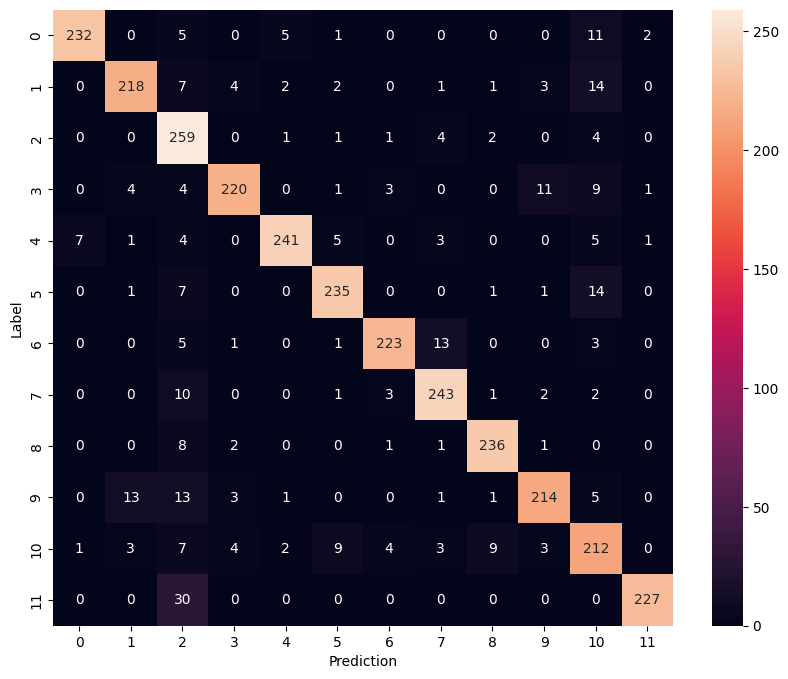

In [49]:
y_pred = model.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(ds_test.map(lambda s,lab: lab)), axis=0)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
